# Getting NFL Quarterback data from NFL.com 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
from bs4 import BeautifulSoup as bs
import numpy as np

In [2]:
NFL_QB_2019 = requests.get('https://www.nfl.com/stats/player-stats/category/passing/2019/POST/all/passingyards/DESC')

In [3]:
NFL_QB_2019_table = bs(NFL_QB_2019.content, 'lxml')

In [4]:
NFL_QB_2019_table = NFL_QB_2019_table.find('table',{'class':"d3-o-table"})

In [5]:
NFL_QB_2019_table

<table class="d3-o-table d3-o-table--detailed d3-o-player-stats--detailed d3-o-table--sortable"><caption class="d3-o-table__caption"><span class="d3-o-table__caption-value">Aggregated players statistics</span></caption><thead><tr><th aria-sort="none" class="header">Player</th><th aria-sort="descending" class="header headerSort" scope="col"><a href="/stats/player-stats/category/passing/2019/REG/all/passingyards/asc">Pass Yds</a></th><th aria-sort="none" class="header" scope="col"><a href="/stats/player-stats/category/passing/2019/REG/all/passingaverageyards/DESC">Yds/Att</a></th><th aria-sort="none" class="header" scope="col"><a href="/stats/player-stats/category/passing/2019/REG/all/passingattempts/DESC">Att</a></th><th aria-sort="none" class="header" scope="col"><a href="/stats/player-stats/category/passing/2019/REG/all/passingcompletions/DESC">Cmp</a></th><th aria-sort="none" class="header" scope="col"><a href="/stats/player-stats/category/passing/2019/REG/all/passingcompletionpercen

In [6]:
NFL_QB_2019_table = pd.read_html(str(NFL_QB_2019_table))[0]

In [7]:
print(type(NFL_QB_2019_table))

<class 'pandas.core.frame.DataFrame'>


In [8]:
NFL_QB_2019_table

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,0.388,75,13,71,47,282
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,0.384,68,16,62,23,151
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,0.351,72,6,66,22,170
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,0.367,57,12,84,34,222
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,0.370,47,5,93,48,316
5,Russell Wilson,4110,8.0,516,341,0.661,31,5,106.3,190,0.368,55,10,60,48,319
6,Tom Brady,4057,6.6,613,373,0.608,24,8,88.0,193,0.315,60,6,59,27,185
7,Derek Carr,4054,7.9,513,361,0.704,21,8,100.8,191,0.372,54,10,75,29,184
8,Carson Wentz,4039,6.7,607,388,0.639,27,7,93.1,213,0.351,52,6,53,37,230
9,Patrick Mahomes,4031,8.3,484,319,0.659,26,5,105.3,176,0.364,50,15,83,17,127


In [9]:
NFL_QB_2019_table.isnull().sum()

Player      0
Pass Yds    0
Yds/Att     0
Att         0
Cmp         0
Cmp %       0
TD          0
INT         0
Rate        0
1st         0
1st%        0
20+         0
40+         0
Lng         0
Sck         0
SckY        0
dtype: int64

In [10]:
Page_2 = requests.get('https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000001900000000008500100079000840a7a000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f737461740000000565736249640000000944415234363631343100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffe6f07fffffe6389bd3f93412939a78c1e6950d620d060004')
Page_2 = bs(Page_2.content, 'lxml')
Page_2 = Page_2.find('table',{'class':"d3-o-table"})
Page_2 = pd.read_html(str(Page_2))[0]
Page_2

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Drew Brees,2979,7.9,378,281,0.743,27,4,116.3,159,0.421,37,7,61,12,89
1,Jacoby Brissett,2942,6.6,447,272,0.609,18,6,88.0,143,0.320,32,3,50,27,159
2,Ryan Tannehill,2742,9.6,286,201,0.703,22,6,117.5,126,0.441,41,9,91,31,212
3,Matthew Stafford,2499,8.6,291,187,0.643,19,5,106.0,117,0.402,41,8,66,18,137
4,Joe Flacco,1822,7.0,262,171,0.653,6,5,85.1,86,0.328,24,5,70,26,194
5,Mason Rudolph,1765,6.2,283,176,0.622,13,9,82.0,80,0.283,21,5,76,15,124
6,Case Keenum,1707,6.9,247,160,0.648,11,5,91.3,83,0.336,18,3,69,15,145
7,Teddy Bridgewater,1384,7.1,196,133,0.679,9,2,99.1,67,0.342,16,2,45,12,89
8,Dwayne Haskins,1365,6.7,203,119,0.586,7,7,76.1,65,0.320,19,3,75,29,204
9,Marcus Mariota,1203,7.5,160,95,0.594,7,2,92.3,50,0.313,17,6,75,25,162


In [11]:
Page_3 = requests.get('https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000003200000000008500100079000840774000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f7374617400000005657362496400000009484f5934343037393100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffcdf07fffffcde1b4eec7a1741bd5f74fd8fb646123be0004')
Page_3 = bs(Page_3.content, 'lxml')
Page_3 = Page_3.find('table',{'class':"d3-o-table"})
Page_3 = pd.read_html(str(Page_3))[0]
Page_3

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Matt Barkley,359,7.0,51,27,0.529,0,3,51.0,15,0.294,6,1,41,2,10
1,Ben Roethlisberger,351,5.7,62,35,0.565,0,1,66.0,14,0.226,4,1,45,2,7
2,Will Grier,228,4.4,52,28,0.538,0,4,33.2,12,0.231,1,0,28,6,44
3,AJ McCarron,225,6.1,37,21,0.568,0,1,63.5,11,0.297,4,0,21,5,43
4,Robert Griffin III,225,5.9,38,23,0.605,1,2,64.0,10,0.263,2,0,39,5,19
5,Sean Mannion,126,6.0,21,12,0.571,0,2,35.1,6,0.286,1,0,35,0,0
6,Colt McCoy,122,4.5,27,18,0.667,0,1,61.0,5,0.185,1,0,22,6,44
7,Mike Glennon,56,5.6,10,6,0.600,1,0,108.8,3,0.300,0,0,19,0,0
8,Taysom Hill,55,9.2,6,3,0.500,0,0,81.9,3,0.500,1,0,20,1,9
9,Brett Hundley,49,4.9,10,4,0.400,0,0,55.8,2,0.200,1,0,28,2,11


In [12]:
Page_4 = requests.get('https://www.nfl.com/stats/player-stats/category/passing/2019/REG/all/passingYards/DESC?aftercursor=0000004b00000000008500100079000840320000000000006e00000005000000045f74626c00000010706572736f6e5f7465616d5f737461740000000565736249640000000947524932393433353100000004726f6c6500000003504c5900000008736561736f6e496400000004323031390000000a736561736f6e5479706500000003524547f07fffffb4f07fffffb496fe1975c31781501d74d08e00f977e80004')
Page_4 = bs(Page_4.content, 'lxml')
Page_4 = Page_4.find('table',{'class':"d3-o-table"})
Page_4 = pd.read_html(str(Page_4))[0]
Page_4

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Dante Pettis,16,16.0,1,1,1.00,0,0,118.8,1,1.00,0,0,16,0,0
1,Logan Cooke,16,8.0,2,2,1.00,0,0,100.0,2,1.00,0,0,9,1,19
2,Tim Boyle,15,3.8,4,3,0.75,0,0,80.2,1,0.25,0,0,7,0,0
3,Jarrett Stidham,14,3.5,4,2,0.50,0,1,18.8,1,0.25,0,0,11,1,7
4,Alvin Kamara,13,13.0,1,1,1.00,0,0,118.8,1,1.00,0,0,13,0,0
5,Michael Palardy,12,12.0,1,1,1.00,0,0,116.7,1,1.00,0,0,12,0,0
6,Brett Kern,11,11.0,1,1,1.00,0,0,112.5,1,1.00,0,0,11,0,0
7,Kelvin Harmon,11,11.0,1,1,1.00,0,0,112.5,1,1.00,0,0,11,0,0
8,DeAndre Hopkins,6,3.0,2,1,0.50,1,1,56.3,1,0.50,0,0,6,0,0
9,Andrew Beck,6,6.0,1,1,1.00,0,0,91.7,1,1.00,0,0,6,0,0


# Join the 4 pages into 1 dataframe

In [13]:
All_passers_2019 = pd.concat([NFL_QB_2019_table, Page_2, Page_3, Page_4], ignore_index = True)
All_passers_2019

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,0.388,75,13,71,47,282
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,0.384,68,16,62,23,151
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,0.351,72,6,66,22,170
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,0.367,57,12,84,34,222
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,0.370,47,5,93,48,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Trevor Siemian,3,0.5,6,3,0.500,0,0,56.3,0,0.000,0,0,3,2,17
86,Blake Bortles,3,1.5,2,1,0.500,0,0,56.3,0,0.000,0,0,3,0,0
87,Kenjon Barner,3,3.0,1,1,1.000,0,0,79.2,0,0.000,0,0,3,0,0
88,Alex Tanney,1,1.0,1,1,1.000,0,0,79.2,0,0.000,0,0,1,0,0


In [79]:
All_passers_2019['TD-INT'] = All_passers_2019['TD'] - All_passers_2019['INT']

In [81]:
All_passers_2019.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,TD-INT
0,Jameis Winston,5109,8.2,626,380,0.607,33,30,84.3,243,0.388,75,13,71,47,282,3
1,Dak Prescott,4902,8.2,596,388,0.651,30,11,99.7,229,0.384,68,16,62,23,151,19
2,Jared Goff,4638,7.4,626,394,0.629,22,16,86.5,220,0.351,72,6,66,22,170,6
3,Philip Rivers,4615,7.8,591,390,0.660,23,20,88.5,217,0.367,57,12,84,34,222,3
4,Matt Ryan,4466,7.3,616,408,0.662,26,14,92.1,228,0.370,47,5,93,48,316,12


# Get combine stats from .csv that was downloaded from kaggle

In [84]:
Combine_stats = pd.read_csv('/Users/mcheesmore/OneDrive - Microsoft/Documents/4. mcheesmore/UCD Cert in Intro to Data Analysis/UCDPA_MarkCheesmore/combine.csv')
print(Combine_stats.head())

   combineId  playerId  combineYear combinePosition  combineHeight  \
0      10000  19870067         1987              CB           69.8   
1      10001  19870154         1987               C           74.8   
2      10002  19870800         1987              FB           71.8   
3      10003  19870121         1987               C           75.0   
4      10004  19870801         1987              WR           72.1   

   combineWeight  combineHand nameFirst   nameLast         nameFull  ...  \
0            198         8.50   Michael      Adams    Michael Adams  ...   
1            266        10.25      John    Adickes     John Adickes  ...   
2            217         9.00     Tommy       Agee       Tommy Agee  ...   
3            279        10.50     David  Alexander  David Alexander  ...   
4            202        10.00    Lyneal     Alston    Lyneal Alston  ...   

  hsCountry  combineArm combine40yd combineVert  combineBench  combineShuttle  \
0       NaN       30.50        4.42      

In [85]:
Combine_stats.isnull().sum()

combineId                0
playerId                 0
combineYear              0
combinePosition          0
combineHeight            0
combineWeight            0
combineHand           6488
nameFirst                2
nameLast                 2
nameFull                 2
position                 3
collegeId                2
nflId                 1087
college                  2
heightInches             7
weight                   7
dob                   1589
ageAtDraft            1589
playerProfileUrl      1087
homeCity              2558
homeState             2707
homeCountry           2511
highSchool            5908
hsCity                7753
hsState               5923
hsCountry             5908
combineArm            6803
combine40yd           1058
combineVert           1619
combineBench          2912
combineShuttle        2594
combineBroad          1769
combine3cone          5266
combine60ydShuttle    8307
combineWonderlic      9715
dtype: int64

In [103]:
Combine_stats['combineYear']

0        1987
1        1987
2        1987
3        1987
4        1987
         ... 
10075    2019
10076    2019
10077    2019
10078    2019
10079    2019
Name: combineYear, Length: 10080, dtype: int64

In [106]:
Combine_stats['Experience'] = 2019 - Combine_stats['combineYear']

In [107]:
Combine_stats.head()

,combineId,playerId,combineYear,combinePosition,combineHeight,combineWeight,combineHand,nameFirst,nameLast,nameFull,...,combineArm,combine40yd,combineVert,combineBench,combineShuttle,combineBroad,combine3cone,combine60ydShuttle,combineWonderlic,Experience
0,10000,19870067,1987,CB,69.8,198,8.50,Michael,Adams,Michael Adams,...,30.50,4.42,32.0,13.0,4.60,118.0,NaN,11.91,NaN,32
1,10001,19870154,1987,C,74.8,266,10.25,John,Adickes,John Adickes,...,30.00,4.97,26.5,25.0,4.60,103.0,NaN,NaN,NaN,32
2,10002,19870800,1987,FB,71.8,217,9.00,Tommy,Agee,Tommy Agee,...,30.75,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,32
3,10003,19870121,1987,C,75.0,279,10.50,David,Alexander,David Alexander,...,32.75,5.13,27.5,22.0,4.33,105.0,NaN,NaN,NaN,32
4,10004,19870801,1987,WR,72.1,202,10.00,Lyneal,Alston,Lyneal Alston,...,33.00,4.64,32.0,7.0,4.52,114.0,NaN,11.85,NaN,32


# Combine the 2 databases from NFL.com and from Kaggle

In [108]:
Wider_stats = All_passers_2019.merge(Combine_stats, how = 'left', left_on='Player', right_on='nameFull')

In [109]:
Wider_stats.shape

(93, 53)

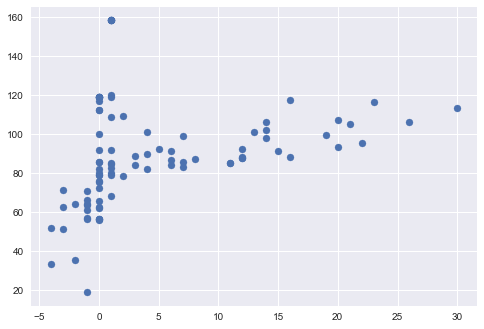

In [110]:
plt.scatter(Wider_stats['TD-INT'],Wider_stats['Rate'])

<AxesSubplot:xlabel='TD-INT', ylabel='Experience'>

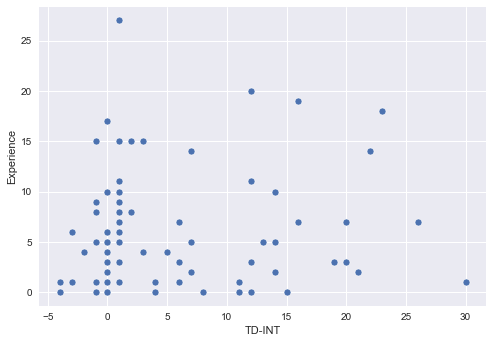

In [112]:
sns.scatterplot(y='Experience',x='TD-INT', data=Wider_stats)

In [20]:
# Analysis
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [113]:
Significant = Wider_stats.corr()

# can we use a heat map to explore variables that have a high correlation
## then compare these to how they performed in 2019?

<AxesSubplot:>

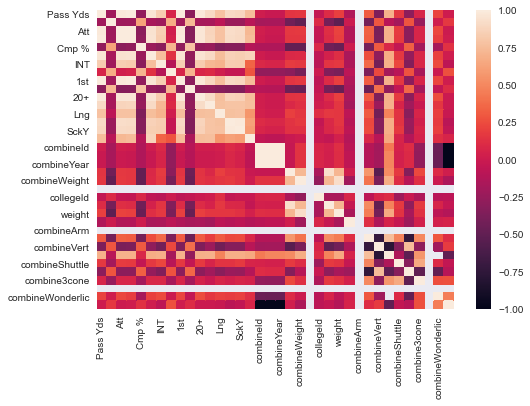

In [114]:
sns.heatmap(Significant)

## I want to also combine how the Quarterbacks were perceived to have performed in 2019 by experts

In [23]:
LJ = requests.get('https://www.ibtimes.com/best-nfl-quarterbacks-2019-ranking-all-32-starting-qbs-lamar-jackson-russell-wilson-2894543?msclkid=ca57e6b6b8b611eca189cef00e2b6adb')
first = bs(LJ.content, 'lxml')
# df = pd.dataframe
x = '0'
first_again = first.find("div", {"class":'article-body'}) #the specifics i'm looking for
for i in first_again.findAll('strong'): 
        print(i.text)
        x = x + i.text
        #df.loc[index, "then2"] = head


1) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating)
2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating)
3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating)
4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating)
5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating)
6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating)
7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating)
8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating)
9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating)
10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating)
11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating)
12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating)
13) Derek Carr, Oakland Raiders (4,054 Yards, 21 TD, 8 INT, 100.8 Rating

In [24]:
x

'01) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating)2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating)3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating)4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating)5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating)6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating)7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating)8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating)9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating)10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating)11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating)12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating)13) Derek Carr, Oakland Raiders (4,054 Yards, 21 TD, 8 INT, 100.8 Rating)14) Tom B

In [25]:
LJ = requests.get('https://www.ibtimes.com/best-nfl-quarterbacks-2019-ranking-all-32-starting-qbs-lamar-jackson-russell-wilson-2894543?msclkid=ca57e6b6b8b611eca189cef00e2b6adb')
first = bs(LJ.content, 'lxml')
first_again = first.find("div", {"class":'article-body'})
dict=''
for i in first_again.findAll('strong'):
    dict=dict+i.text + ' * '
    print(i.text)


1) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating)
2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating)
3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating)
4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating)
5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating)
6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating)
7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating)
8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating)
9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating)
10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating)
11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating)
12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating)
13) Derek Carr, Oakland Raiders (4,054 Yards, 21 TD, 8 INT, 100.8 Rating

In [26]:
dict

'1) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating) * 2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating) * 3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating) * 4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating) * 5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating) * 6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating) * 7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating) * 8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating) * 9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating) * 10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating) * 11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating) * 12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating) * 13) Derek Carr, Oakland Raiders (4,054 Yards, 2

In [27]:
# Python3 code to demonstrate
# to extract words from string
# using split()
 
# initializing string 
test_string = dict

# using split()
# to extract words from string
res = test_string.split('*')
 
# printing result
#print ("The list of words is : " +  str(res))
str(res)


"['1) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating) ', ' 2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating) ', ' 3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating) ', ' 4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating) ', ' 5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating) ', ' 6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating) ', ' 7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating) ', ' 8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating) ', ' 9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating) ', ' 10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating) ', ' 11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating) ', ' 12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating) ', ' 13) Derek

In [28]:
dict.split(' * ')

['1) Lamar Jackson, Baltimore Ravens (3,127 Yards, 36 TD, 6 INT, 113.3 Rating)',
 '2) Russell Wilson, Seattle Seahawks (4,110 Yards, 31 TD, 5 INT, 107.4 Rating)',
 '3) Patrick Mahomes, Kansas City Chiefs (4,031 Yards, 26 TD. 5 INT, 105.3 Rating)',
 '4) Deshaun Watson, Houston Texans (3,852 Yards, 26 TD, 12 INT, 98.0 Rating)',
 '5) Kirk Cousins, Minnesota Vikings (3,603 Yards, 26 TD, 6 INT, 107.4 Rating)',
 '6) Aaron Rodgers, Green Bay Packers (4,002 Yards, 26 TD, 4 INT, 95.4 Rating)',
 '7) Carson Wentz, Philadelphia Eagles (4,039 Yards, 27 TD, 7 INT, 93.1 Rating)',
 '8) Dak Prescott, Dallas Cowboys (4,902 Yards, 30 TD, 11 INT, 99.7 Rating)',
 '9) Ryan Tannehill, Tennessee Titans (2,747 Yards, 22 TD, 6 INT, 117.5 Rating)',
 '10) Drew Brees, New Orleans Saints (2,979 Yards, 27 TD, 4 INT, 116.3 Rating)',
 '11) Jimmy Garoppolo, San Francisco 49ers (3,978 Yards, 27 TD, 13 INT, 102.0 Rating)',
 '12) Josh Allen, Buffalo Bills (3,089 Yards, 20 TD, 9 INT, 85.3 Rating)',
 '13) Derek Carr, Oaklan

In [29]:
df = pd.DataFrame([res])
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...","2) Russell Wilson, Seattle Seahawks (4,110 Ya...","3) Patrick Mahomes, Kansas City Chiefs (4,031...","4) Deshaun Watson, Houston Texans (3,852 Yard...","5) Kirk Cousins, Minnesota Vikings (3,603 Yar...","6) Aaron Rodgers, Green Bay Packers (4,002 Ya...","7) Carson Wentz, Philadelphia Eagles (4,039 Y...","8) Dak Prescott, Dallas Cowboys (4,902 Yards,...","9) Ryan Tannehill, Tennessee Titans (2,747 Ya...","10) Drew Brees, New Orleans Saints (2,979 Yar...",...,"24) Sam Darnold, New York Jets (3,024 Yards, ...","25) Mitchell Trubisky, Chicago Bears (3,138 Y...","26) Daniel Jones, New York Giants (3,027 Yard...","27) Case Keenum, Washington Redskins (1,707 Y...","28) Baker Mayfield, Cleveland Browns (3,827 Y...","29) Joe Flacco, Denver Broncos (1,822 Yards, ...","30) Kyle Allen, Carolina Panthers (3,222 Yard...","31) Andy Dalton, Cincinnati Bengals (3,494 Ya...","32) Mason Rudolph, Pittsburgh Steelers (1,765...",


In [30]:
df = df.transpose()
df

,0
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard..."
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya..."
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031..."
3,"4) Deshaun Watson, Houston Texans (3,852 Yard..."
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar..."
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya..."
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y..."
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,..."
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya..."
9,"10) Drew Brees, New Orleans Saints (2,979 Yar..."


In [31]:
for index, row in df.iterrows(): 
    text = str(row[0])
    head, sep, tail = text.partition(',')
    print(head)
    df.loc[index, "now"] = head


1) Lamar Jackson
 2) Russell Wilson
 3) Patrick Mahomes
 4) Deshaun Watson
 5) Kirk Cousins
 6) Aaron Rodgers
 7) Carson Wentz
 8) Dak Prescott
 9) Ryan Tannehill
 10) Drew Brees
 11) Jimmy Garoppolo
 12) Josh Allen
 13) Derek Carr
 14) Tom Brady
 15) Matt Ryan
 16) Matthew Stafford
 17) Jameis Winston
 18) Kyler Murray
 19) Jacoby Brissett
 20) Philip Rivers
 21) Ryan Fitzpatrick
 22) Jared Goff
 23) Gardner Minshew
 24) Sam Darnold
 25) Mitchell Trubisky
 26) Daniel Jones
 27) Case Keenum
 28) Baker Mayfield
 29) Joe Flacco
 30) Kyle Allen
 31) Andy Dalton
 32) Mason Rudolph
 


In [32]:
df

,0,now
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...",1) Lamar Jackson
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya...",2) Russell Wilson
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031...",3) Patrick Mahomes
3,"4) Deshaun Watson, Houston Texans (3,852 Yard...",4) Deshaun Watson
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar...",5) Kirk Cousins
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya...",6) Aaron Rodgers
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y...",7) Carson Wentz
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,...",8) Dak Prescott
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya...",9) Ryan Tannehill
9,"10) Drew Brees, New Orleans Saints (2,979 Yar...",10) Drew Brees


In [33]:
for index, row in df.iterrows(): 
    text = str(row['now'])
    head, sep, tail = text.partition(') ')
    print(tail)
    df.loc[index, "name"] = tail

Lamar Jackson
Russell Wilson
Patrick Mahomes
Deshaun Watson
Kirk Cousins
Aaron Rodgers
Carson Wentz
Dak Prescott
Ryan Tannehill
Drew Brees
Jimmy Garoppolo
Josh Allen
Derek Carr
Tom Brady
Matt Ryan
Matthew Stafford
Jameis Winston
Kyler Murray
Jacoby Brissett
Philip Rivers
Ryan Fitzpatrick
Jared Goff
Gardner Minshew
Sam Darnold
Mitchell Trubisky
Daniel Jones
Case Keenum
Baker Mayfield
Joe Flacco
Kyle Allen
Andy Dalton
Mason Rudolph



In [34]:
df

,0,now,name
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...",1) Lamar Jackson,Lamar Jackson
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya...",2) Russell Wilson,Russell Wilson
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031...",3) Patrick Mahomes,Patrick Mahomes
3,"4) Deshaun Watson, Houston Texans (3,852 Yard...",4) Deshaun Watson,Deshaun Watson
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar...",5) Kirk Cousins,Kirk Cousins
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya...",6) Aaron Rodgers,Aaron Rodgers
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y...",7) Carson Wentz,Carson Wentz
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,...",8) Dak Prescott,Dak Prescott
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya...",9) Ryan Tannehill,Ryan Tannehill
9,"10) Drew Brees, New Orleans Saints (2,979 Yar...",10) Drew Brees,Drew Brees


In [35]:
for index, row in df.iterrows(): 
    text = str(row['now'])
    head, sep, tail = text.partition(') ')
    print(head)
    df.loc[index, "Rank"] = head


1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32
 


In [36]:
df

,0,now,name,Rank
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...",1) Lamar Jackson,Lamar Jackson,1
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya...",2) Russell Wilson,Russell Wilson,2
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031...",3) Patrick Mahomes,Patrick Mahomes,3
3,"4) Deshaun Watson, Houston Texans (3,852 Yard...",4) Deshaun Watson,Deshaun Watson,4
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar...",5) Kirk Cousins,Kirk Cousins,5
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya...",6) Aaron Rodgers,Aaron Rodgers,6
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y...",7) Carson Wentz,Carson Wentz,7
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,...",8) Dak Prescott,Dak Prescott,8
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya...",9) Ryan Tannehill,Ryan Tannehill,9
9,"10) Drew Brees, New Orleans Saints (2,979 Yar...",10) Drew Brees,Drew Brees,10


In [37]:
for index, row in df.iterrows(): 
        text2 = int(row['Rank'])
        #text2 = int(text2)
        df.loc[index, "Rank"] = text2
        print(type(text2))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


ValueError: invalid literal for int() with base 10: ' '

In [115]:
df['Sum'] = df['Rank'] * 2
df

,0,now,name,Rank,Sum,Rate
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...",1) Lamar Jackson,Lamar Jackson,1.0,2.0,113.3
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya...",2) Russell Wilson,Russell Wilson,2.0,4.0,106.3
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031...",3) Patrick Mahomes,Patrick Mahomes,3.0,6.0,105.3
3,"4) Deshaun Watson, Houston Texans (3,852 Yard...",4) Deshaun Watson,Deshaun Watson,4.0,8.0,98.0
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar...",5) Kirk Cousins,Kirk Cousins,5.0,10.0,107.4
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya...",6) Aaron Rodgers,Aaron Rodgers,6.0,12.0,95.4
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y...",7) Carson Wentz,Carson Wentz,7.0,14.0,93.1
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,...",8) Dak Prescott,Dak Prescott,8.0,16.0,99.7
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya...",9) Ryan Tannehill,Ryan Tannehill,9.0,18.0,117.5
9,"10) Drew Brees, New Orleans Saints (2,979 Yar...",10) Drew Brees,Drew Brees,10.0,20.0,116.3


In [116]:
Where_in_the_Draft = pd.read_csv('/Users/mcheesmore/UCDPA_MarkCheesmore/2000-2021_Draft_Picks.csv')
print(Where_in_the_Draft.head())

   Year  Round  Pick  Overall             Name     Team Position  \
0  2000      1     1        1   Courtney Brown   BROWNS       DE   
1  2000      1     2        2  LaVar Arrington     TEAM       LB   
2  2000      1     3        3    Chris Samuels     TEAM        T   
3  2000      1     4        4    Peter Warrick  BENGALS       WR   
4  2000      1     5        5      Jamal Lewis   RAVENS       RB   

          School  
0     Penn State  
1     Penn State  
2        Alabama  
3  Florida State  
4      Tennessee  


In [117]:
Draft_2019_Actual = df.merge(Where_in_the_Draft, how = 'left', left_on='name', right_on='Name')

In [118]:
Draft_2019_Actual

,0,now,name,Rank,Sum,Rate,Year,Round,Pick,Overall,Name,Team,Position,School
0,"1) Lamar Jackson, Baltimore Ravens (3,127 Yard...",1) Lamar Jackson,Lamar Jackson,1.0,2.0,113.3,2018.0,1.0,32.0,32.0,Lamar Jackson,RAVENS,QB,Louisville
1,"2) Russell Wilson, Seattle Seahawks (4,110 Ya...",2) Russell Wilson,Russell Wilson,2.0,4.0,106.3,2012.0,3.0,12.0,75.0,Russell Wilson,SEAHAWKS,QB,Wisconsin
2,"3) Patrick Mahomes, Kansas City Chiefs (4,031...",3) Patrick Mahomes,Patrick Mahomes,3.0,6.0,105.3,2017.0,1.0,10.0,10.0,Patrick Mahomes,CHIEFS,QB,Texas Tech
3,"4) Deshaun Watson, Houston Texans (3,852 Yard...",4) Deshaun Watson,Deshaun Watson,4.0,8.0,98.0,2017.0,1.0,12.0,12.0,Deshaun Watson,TEXANS,QB,Clemson
4,"5) Kirk Cousins, Minnesota Vikings (3,603 Yar...",5) Kirk Cousins,Kirk Cousins,5.0,10.0,107.4,2012.0,4.0,7.0,102.0,Kirk Cousins,TEAM,QB,Michigan State
5,"6) Aaron Rodgers, Green Bay Packers (4,002 Ya...",6) Aaron Rodgers,Aaron Rodgers,6.0,12.0,95.4,2005.0,1.0,24.0,24.0,Aaron Rodgers,PACKERS,QB,California
6,"7) Carson Wentz, Philadelphia Eagles (4,039 Y...",7) Carson Wentz,Carson Wentz,7.0,14.0,93.1,2016.0,1.0,2.0,2.0,Carson Wentz,EAGLES,QB,North Dakota State
7,"8) Dak Prescott, Dallas Cowboys (4,902 Yards,...",8) Dak Prescott,Dak Prescott,8.0,16.0,99.7,2016.0,4.0,37.0,135.0,Dak Prescott,COWBOYS,QB,Mississippi State
8,"9) Ryan Tannehill, Tennessee Titans (2,747 Ya...",9) Ryan Tannehill,Ryan Tannehill,9.0,18.0,117.5,2012.0,1.0,8.0,8.0,Ryan Tannehill,DOLPHINS,QB,Texas A&M
9,"10) Drew Brees, New Orleans Saints (2,979 Yar...",10) Drew Brees,Drew Brees,10.0,20.0,116.3,2001.0,2.0,1.0,32.0,Drew Brees,CHARGERS,QB,Purdue


In [121]:
sns.scatterplot(y='Rank',x='Overall', data=Draft_2019_Actual, hue='TD-INT')

ValueError: Could not interpret value `TD-INT` for parameter `hue`

# A histogram might be good here to show where the top 24 QBs were taken in the draft

In [94]:
Wider_stats.shape

(93, 52)

In [95]:
Super_merge_Top24 = Wider_stats.merge(Draft_2019_Actual, how = 'right', left_on='Player', right_on='Name')

In [96]:
Super_merge_Top24.head()

,Player,Pass Yds,Yds/Att,Att,Cmp,Cmp %,TD,INT,Rate_x,1st,...,Sum,Rate_y,Year,Round,Pick,Overall,Name,Team,Position,School
0,Lamar Jackson,3127.0,7.8,401.0,265.0,0.661,36.0,6.0,113.3,161.0,...,2,113.3,2018.0,1.0,32.0,32.0,Lamar Jackson,RAVENS,QB,Louisville
1,Russell Wilson,4110.0,8.0,516.0,341.0,0.661,31.0,5.0,106.3,190.0,...,4,106.3,2012.0,3.0,12.0,75.0,Russell Wilson,SEAHAWKS,QB,Wisconsin
2,Patrick Mahomes,4031.0,8.3,484.0,319.0,0.659,26.0,5.0,105.3,176.0,...,6,105.3,2017.0,1.0,10.0,10.0,Patrick Mahomes,CHIEFS,QB,Texas Tech
3,Deshaun Watson,3852.0,7.8,495.0,333.0,0.673,26.0,12.0,98.0,191.0,...,8,98.0,2017.0,1.0,12.0,12.0,Deshaun Watson,TEXANS,QB,Clemson
4,Kirk Cousins,3603.0,8.1,444.0,307.0,0.691,26.0,6.0,107.4,165.0,...,10,107.4,2012.0,4.0,7.0,102.0,Kirk Cousins,TEAM,QB,Michigan State


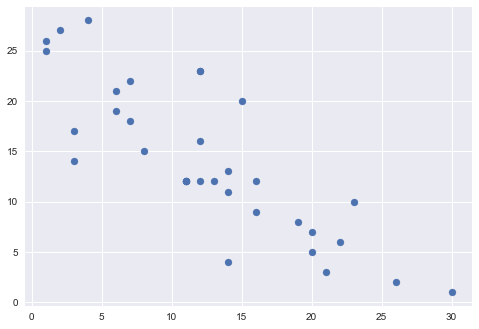

In [97]:
plt.scatter(Super_merge_Top24['TD-INT'], Super_merge_Top24['Rank'])


In [77]:
AnyClue = Super_merge_Top24.corr()

<AxesSubplot:>

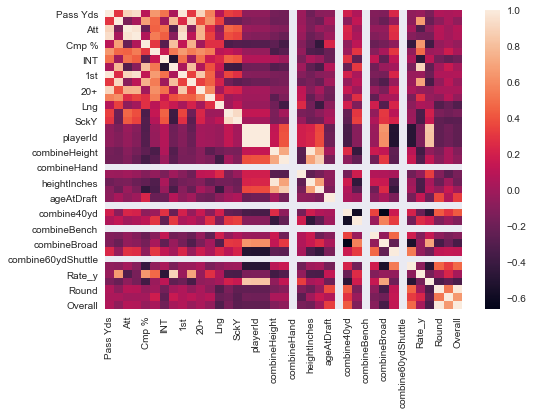

In [78]:
sns.heatmap(AnyClue)